In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
data_mal = pd.read_csv('mal-dns2tcp.csv', delimiter=',')
data_mal['DoH'] = 'dns2tcp'
df2_malic = pd.read_csv('mal-dnscat2.csv', delimiter=',')
df2_malic['DoH'] = 'dnscat2'
df3_malic = pd.read_csv('mal-iodine.csv', delimiter=',')
df3_malic['DoH'] = 'iodine'
data_mal = pd.concat([data_mal,df2_malic])
data_mal = pd.concat([data_mal,df3_malic])
data_mal = data_mal.rename(columns={'DoH': 'Label'})
df = data_mal
df.head()
print(df['Label'].value_counts())

dns2tcp    167517
iodine      46598
dnscat2     35854
Name: Label, dtype: int64


In [3]:
df.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [4]:
from sklearn.utils import shuffle
drop_columns = ["TimeStamp", "SourceIP", "DestinationIP", "SourcePort","DestinationPort", 
                "Duration"]
df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Label'].value_counts())

dns2tcp    167316
iodine      46533
dnscat2     35825
Name: Label, dtype: int64


In [5]:
df

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
158001,1807,54.381491,4895,147.314555,141408.773333,376.043579,223.400000,76.0,68,1.175928,...,1.643213,0.000059,0.007697,0.010968,0.016208,0.000022,-2.042599,1.422149,0.701751,dns2tcp
154471,1153,1167.455433,4100,4151.402668,189294.627500,435.080024,262.650000,72.0,68,1.314586,...,1.017998,0.000091,0.009515,0.008629,0.004809,0.000009,1.204445,0.905924,1.102695,dns2tcp
159155,1510,82.802129,4482,245.774267,191606.603175,437.728915,285.333333,99.0,68,1.277046,...,2.544496,0.000112,0.010573,0.014674,0.015370,0.000273,-0.197406,1.362102,0.720501,dns2tcp
54761,1085,3459.159600,4100,13071.478671,215144.094183,463.836280,272.894737,68.0,68,1.325218,...,0.785660,0.000093,0.009639,0.009540,0.008299,0.000005,0.386486,0.989201,1.010387,dns2tcp
78310,985,45.262923,3493,160.511055,222785.859375,472.001970,279.875000,72.0,68,1.321234,...,1.574824,14.238480,3.773391,1.709075,0.023745,0.000264,1.339906,0.452858,2.207856,dns2tcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,21130,175.362465,26972,223.846493,6644.270032,81.512392,144.885542,180.0,68,-1.292360,...,0.572893,0.083021,0.288133,0.177225,0.026673,0.026536,1.567518,0.522983,1.625806,iodine
5490,320771,2671.766092,678534,5651.645983,28568.879903,169.023312,262.698475,258.0,68,0.083393,...,0.579095,0.000018,0.004282,0.016604,0.015484,0.015322,0.784587,0.299365,0.257871,iodine
1673,20580,170.213622,34916,288.784199,75001.770949,273.864512,178.443730,165.0,68,0.147267,...,0.601720,0.486612,0.697576,0.285630,0.015175,0.026446,1.163122,0.371549,2.442239,dns2tcp
150624,1806,52.987250,4827,141.622069,145425.992866,381.347601,228.724138,76.0,68,1.201456,...,1.591559,0.000068,0.008242,0.011241,0.015458,0.000020,-1.535107,1.361488,0.733184,dns2tcp


In [6]:
df['Label'].value_counts()

dns2tcp    167316
iodine      46533
dnscat2     35825
Name: Label, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249674 entries, 158001 to 29061
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   FlowBytesSent                           249674 non-null  int64  
 1   FlowSentRate                            249674 non-null  float64
 2   FlowBytesReceived                       249674 non-null  int64  
 3   FlowReceivedRate                        249674 non-null  float64
 4   PacketLengthVariance                    249674 non-null  float64
 5   PacketLengthStandardDeviation           249674 non-null  float64
 6   PacketLengthMean                        249674 non-null  float64
 7   PacketLengthMedian                      249674 non-null  float64
 8   PacketLengthMode                        249674 non-null  int64  
 9   PacketLengthSkewFromMedian              249674 non-null  float64
 10  PacketLengthSkewFromMode                

In [8]:
feat_cols = list(df.columns)
label_col = "Label"

feat_cols.remove(label_col)
feat_cols

['FlowBytesSent',
 'FlowSentRate',
 'FlowBytesReceived',
 'FlowReceivedRate',
 'PacketLengthVariance',
 'PacketLengthStandardDeviation',
 'PacketLengthMean',
 'PacketLengthMedian',
 'PacketLengthMode',
 'PacketLengthSkewFromMedian',
 'PacketLengthSkewFromMode',
 'PacketLengthCoefficientofVariation',
 'PacketTimeVariance',
 'PacketTimeStandardDeviation',
 'PacketTimeMean',
 'PacketTimeMedian',
 'PacketTimeMode',
 'PacketTimeSkewFromMedian',
 'PacketTimeSkewFromMode',
 'PacketTimeCoefficientofVariation',
 'ResponseTimeTimeVariance',
 'ResponseTimeTimeStandardDeviation',
 'ResponseTimeTimeMean',
 'ResponseTimeTimeMedian',
 'ResponseTimeTimeMode',
 'ResponseTimeTimeSkewFromMedian',
 'ResponseTimeTimeSkewFromMode',
 'ResponseTimeTimeCoefficientofVariation']

In [9]:
len(feat_cols)

28

In [10]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

<Axes: >

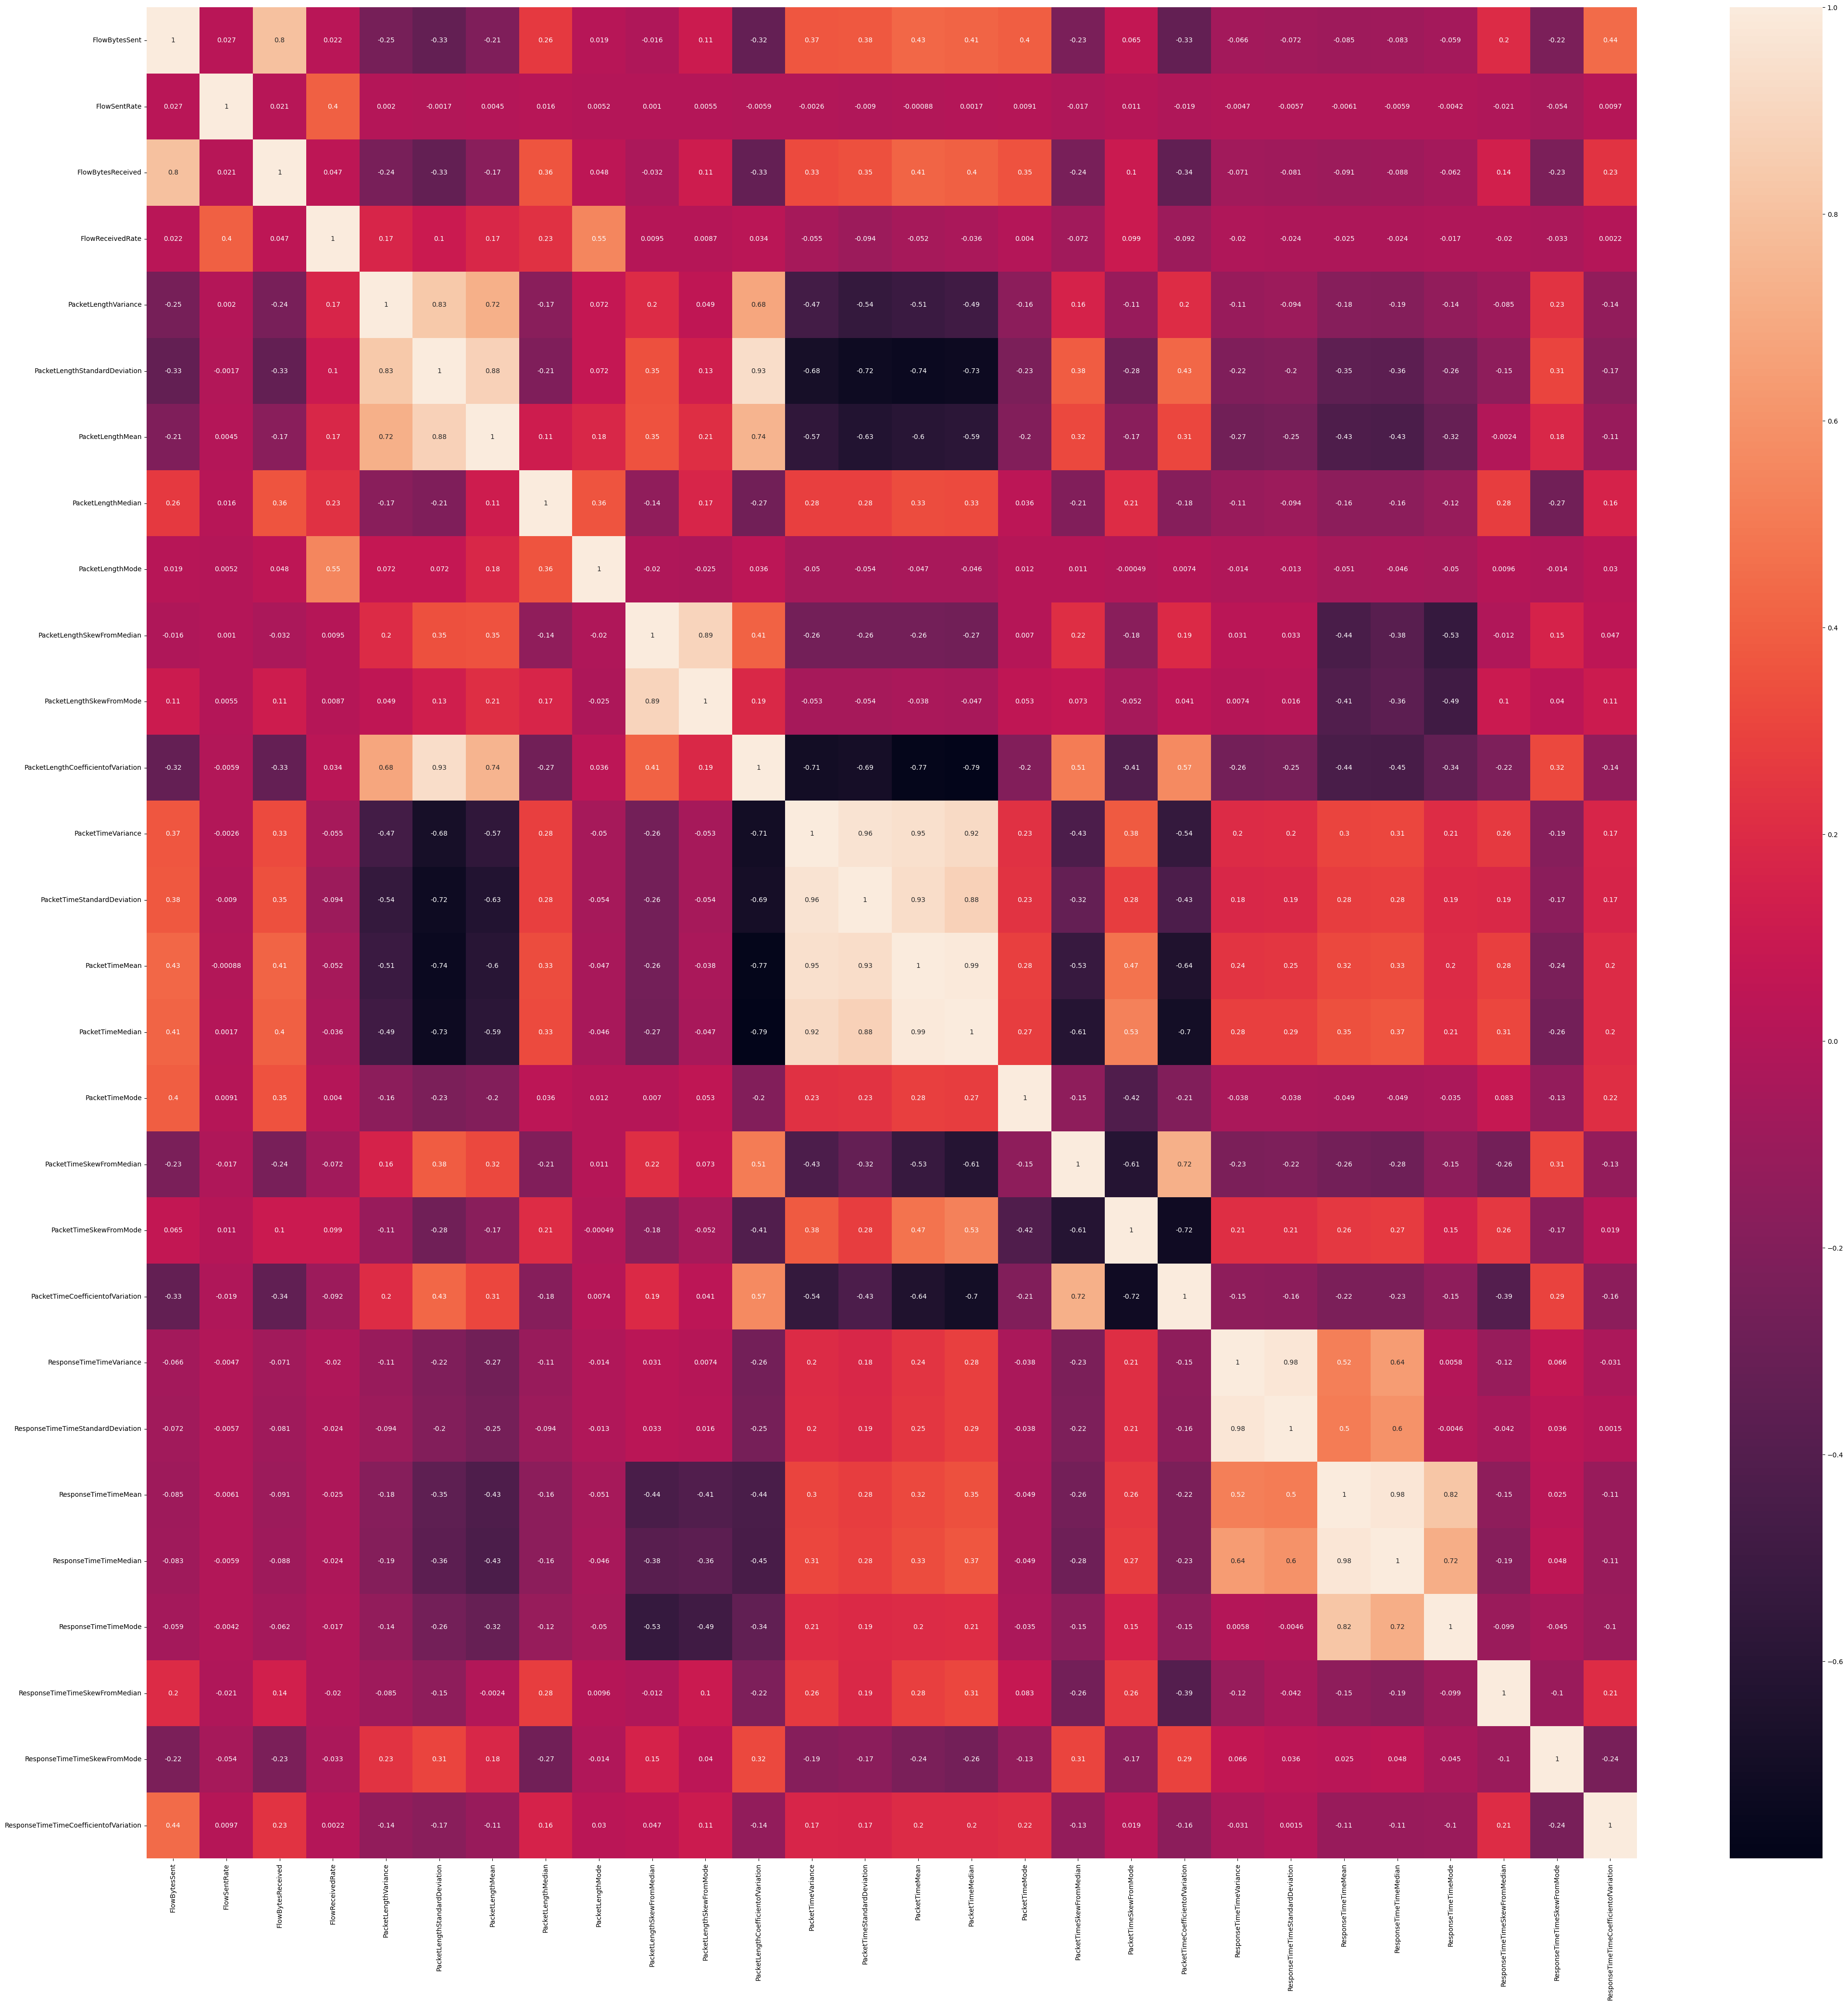

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

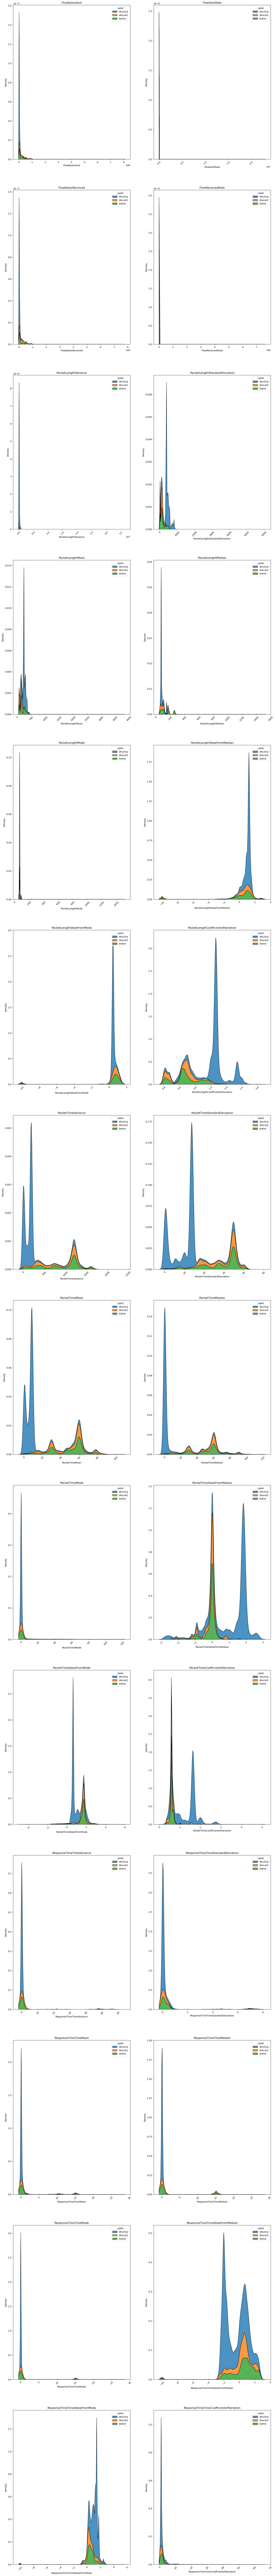

In [12]:
fig, axes = plt.subplots(len(feat_cols)//2, 2, figsize=(20,200))
for i, x in enumerate(feat_cols):
    ax = axes[int(i/2), i%2]
    sns.kdeplot(data=df, x=x, hue=label_col, multiple="stack", 
                warn_singular=False, alpha=0.8, ax=ax)
    ax.set_title(x)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)